<a href="https://colab.research.google.com/github/anushamanur/CSC591_ADBI/blob/master/buildgraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
#mount data code here add the path to datapath variable
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
DATA_PATH = '/content/gdrive/My Drive/Capstone_ADBI/'

In [0]:
import csv
import networkx as nx
import matplotlib as plt
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
from nltk.stem.snowball import SnowballStemmer

In [61]:
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [0]:
G=nx.Graph()

In [63]:
row_index=0
counter=0
with open(DATA_PATH+'movie_metadata.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  actors={}
  directors={}
  genres={}
  titles={}
  languages={}
  for row in csv_reader:
    print(row)
    if row_index!=0:
      
      if row[4] not in titles:
        counter+=1
        G.add_node(counter,title=row[4])
        titles[row[4]]=counter
      
      if row[0] not in directors:
        counter+=1
        G.add_node(counter,director=row[0])
        directors[row[0]]=counter
      
      if row[1] not in actors:
        counter+=1
        G.add_node(counter,actor=row[1])
        actors[row[1]]=counter
      
      genres_list=row[2].split("|")
      
      for genre in genres_list:
        if genre not in genres:
          counter+=1
          G.add_node(counter,genre=genre)
          genres[genre]=counter
        
      if row[3] not in actors:
        counter+=1
        G.add_node(counter,actor=row[3])
        actors[row[3]]=counter
      
      if row[5] not in actors:
        counter+=1
        G.add_node(counter,actor=row[5])
        actors[row[5]]=counter
      
      if row[6] not in languages:
        counter+=1
        G.add_node(counter,language=row[6])
        languages[row[6]]=counter
        
      
      G.add_edge(directors[row[0]],titles[row[4]],relation="directs")
      G.add_edge(actors[row[1]],titles[row[4]],relation="acts")
      G.add_edge(actors[row[3]],titles[row[4]],relation="acts")
      G.add_edge(actors[row[5]],titles[row[4]],relation="acts")
      for genre in genres_list:
          G.add_edge(genres[genre],titles[row[4]],relation="genre")
      G.add_edge(languages[row[6]],titles[row[4]],relation="language")
            
    row_index+=1
    


['director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'language']
['James Cameron', 'Joel David Moore', 'Action|Adventure|Fantasy|Sci-Fi', 'CCH Pounder', 'Avatar', 'Wes Studi', 'English']
['Gore Verbinski', 'Orlando Bloom', 'Action|Adventure|Fantasy', 'Johnny Depp', "Pirates of the Caribbean: At World's End", 'Jack Davenport', 'English']
['Sam Mendes', 'Rory Kinnear', 'Action|Adventure|Thriller', 'Christoph Waltz', 'Spectre', 'Stephanie Sigman', 'English']
['Christopher Nolan', 'Christian Bale', 'Action|Thriller', 'Tom Hardy', 'The Dark Knight Rises', 'Joseph Gordon-Levitt', 'English']
['Doug Walker', 'Rob Walker', 'Documentary', 'Doug Walker', 'Star Wars: Episode VII - The Force Awakens', '', 'English']
['Andrew Stanton', 'Samantha Morton', 'Action|Adventure|Sci-Fi', 'Daryl Sabara', 'John Carter', 'Polly Walker', 'English']
['Sam Raimi', 'James Franco', 'Action|Adventure|Romance', 'J.K. Simmons', 'Spider-Man 3', 'Kirsten Dunst', 'English']
['Nathan

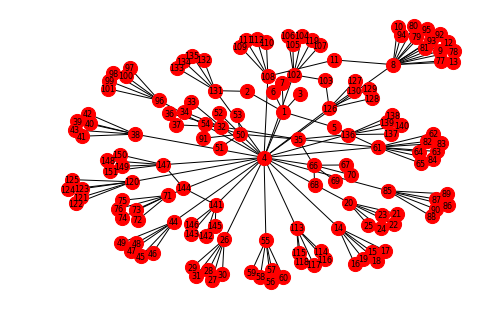

In [0]:
pos = nx.spring_layout(G,scale=4)
nx.draw(G, with_labels=True, node_size=200,font_size=8)

In [64]:
#We parse questions from our question dataset for entities and relations. We query the above generated graph with the parsed entities and relation 
#and compare it to the results obtained by querying the Google Knowledge Graph API.

article="Who acts in Frozen?"
stemmer = SnowballStemmer("english")

def fn_preprocess(art):
    art = nltk.word_tokenize(art)
    art = nltk.pos_tag(art)
    return art

art_processed = fn_preprocess(article)

results = ne_chunk(art_processed)

for x in str(results).split('\n'):
    if '/NN' in x:
        print(x)
        
pattern = 'NP: {<DT>?<JJ>*<NN>}'

#Take the token that is a verb(acts,directs,stars, etc) and convert it to its stemmed form. This will be the relation part of the query to the 
#Entity relation graph.

cp = nltk.RegexpParser(pattern)
cs = cp.parse(art_processed)

print(cs)

acts={'star','act','play'}
directs={'direct'}
iob_tagged = tree2conlltags(cs)
NNPs=[]

for x in iob_tagged:
  stemmed_x=stemmer.stem(x[0])
  print(stemmed_x)
  if stemmed_x in acts:
    relation="acts"
  elif stemmed_x in directs:
    relation="directs"
  if('NNP' in x[1]):
    NNPs.append(x[0])

pprint(iob_tagged)
print(NNPs,relation)

(S Who/WP acts/VBZ in/IN (GPE Frozen/NNP) ?/.)
(S Who/WP acts/VBZ in/IN Frozen/NNP ?/.)
who
act
in
frozen
?
[('Who', 'WP', u'O'),
 ('acts', 'VBZ', u'O'),
 ('in', 'IN', u'O'),
 ('Frozen', 'NNP', u'O'),
 ('?', '.', u'O')]
(['Frozen'], 'acts')


In [75]:
types=['director','actor','genre','title','language']
node_list=list(G.nodes(data='title'))
print(node_list)
for node in node_list:
  if node[1]=="True Lies":
    dnode=node
    break
    

for movie in G.edges(dnode[0]):
  print(movie)
  

[(1, 'Avatar'), (2, None), (3, None), (4, None), (5, None), (6, None), (7, None), (8, None), (9, None), (10, None), (11, "Pirates of the Caribbean: At World's End"), (12, None), (13, None), (14, None), (15, None), (16, 'Spectre'), (17, None), (18, None), (19, None), (20, None), (21, None), (22, 'The Dark Knight Rises'), (23, None), (24, None), (25, None), (26, None), (27, 'Star Wars: Episode VII - The Force Awakens'), (28, None), (29, None), (30, None), (31, None), (32, None), (33, 'John Carter'), (34, None), (35, None), (36, None), (37, None), (38, 'Spider-Man 3'), (39, None), (40, None), (41, None), (42, None), (43, None), (44, 'Tangled'), (45, None), (46, None), (47, None), (48, None), (49, None), (50, None), (51, None), (52, None), (53, 'Avengers: Age of Ultron'), (54, None), (55, None), (56, None), (57, None), (58, 'Harry Potter and the Half-Blood Prince'), (59, None), (60, None), (61, None), (62, None), (63, None), (64, 'Batman v Superman: Dawn of Justice'), (65, None), (66, None